# Description
This notebook prepares a plot of the data next to the MLE fit.

In [1]:
import json
import matplotlib
from matplotlib import pyplot, cm
import matplotlib.image as mpimg
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition, mark_inset
import numpy
import pandas
import pathlib

import calibr8
import murefi

import models
import plotting

DP_PROCESSED = pathlib.Path("processed")

In [2]:
cm_biomass = models.get_biomass_model()
cm_glucose = models.get_glucose_model()
model = models.MonodModel()
dataset = murefi.load_dataset(DP_PROCESSED / "cultivation_dataset.h5")
theta_mapping = models.get_parameter_mapping(rids=dataset.keys())

### Load process model parameters

In [3]:
with open(DP_PROCESSED / "full_dataset_mle.json") as jfile:
    theta_dict = json.load(jfile)

In [4]:
template = murefi.Dataset.make_template_like(dataset, independent_keys=["S", "X"])
prediction = model.predict_dataset(
    template=template, parameter_mapping=theta_mapping, parameters=theta_dict
)

c:\users\osthege\repos\calibr8\calibr8\core.py:974: RuntimeWarning: invalid value encountered in power
  x_hat = - (x1**(-x1*x3) * numpy.log( ((1/y)**x0 - 1) * numpy.exp(-x0*x4+x2-x4) ) ) / s
c:\users\osthege\repos\calibr8\calibr8\core.py:974: RuntimeWarning: invalid value encountered in power
  x_hat = - (x1**(-x1*x3) * numpy.log( ((1/y)**x0 - 1) * numpy.exp(-x0*x4+x2-x4) ) ) / s
c:\users\osthege\repos\calibr8\calibr8\core.py:974: RuntimeWarning: invalid value encountered in power
  x_hat = - (x1**(-x1*x3) * numpy.log( ((1/y)**x0 - 1) * numpy.exp(-x0*x4+x2-x4) ) ) / s
c:\users\osthege\repos\calibr8\calibr8\core.py:974: RuntimeWarning: invalid value encountered in power
  x_hat = - (x1**(-x1*x3) * numpy.log( ((1/y)**x0 - 1) * numpy.exp(-x0*x4+x2-x4) ) ) / s
c:\users\osthege\repos\calibr8\calibr8\core.py:974: RuntimeWarning: invalid value encountered in power
  x_hat = - (x1**(-x1*x3) * numpy.log( ((1/y)**x0 - 1) * numpy.exp(-x0*x4+x2-x4) ) ) / s
c:\users\osthege\repos\calibr8\calibr8\c

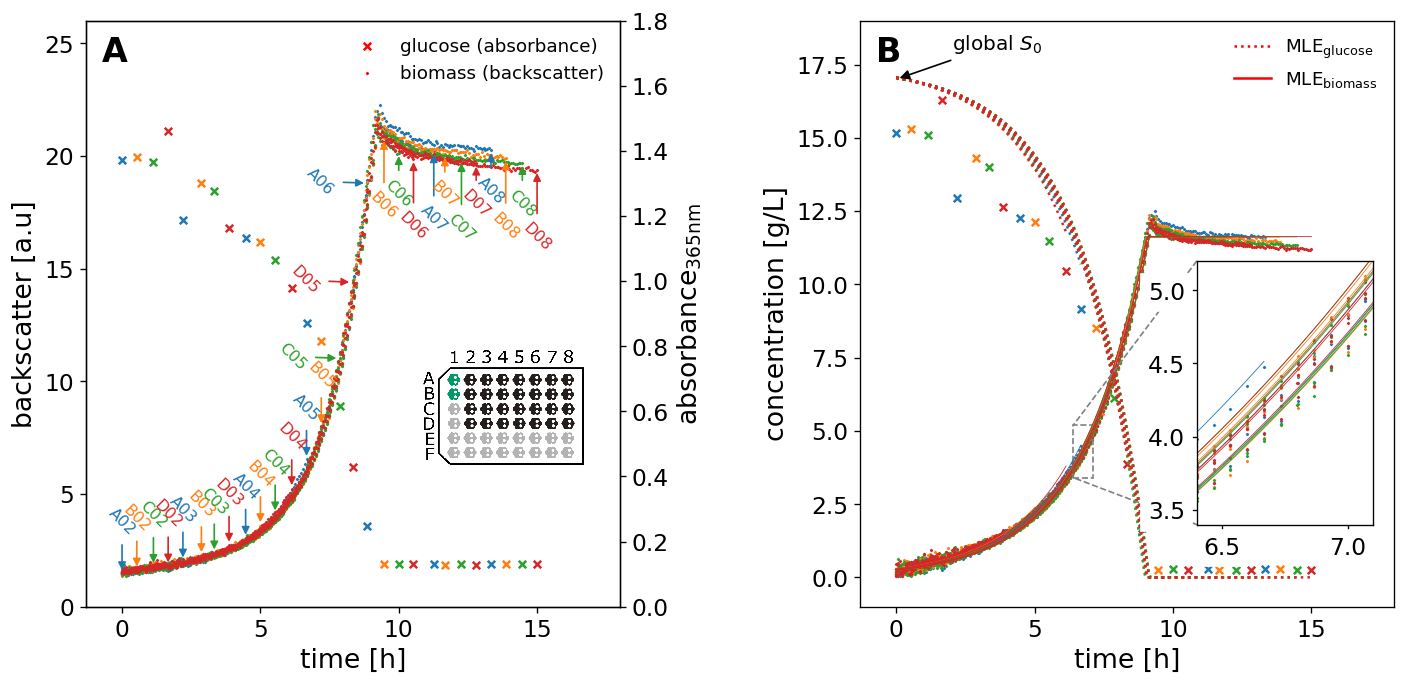

In [5]:
fig = plotting.plot_mle(
    cm_biomass=cm_biomass,
    cm_glucose=cm_glucose,
    dataset=dataset,
    prediction=prediction,
)
plotting.savefig(fig, "4.2.2 Process Model MLE with data")
pyplot.show()

In [6]:
%load_ext watermark
%watermark

Last updated: 2021-12-15T14:57:48.784848+01:00

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.24.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 6
Architecture: 64bit

